# Given

Train data

|   x1  |   x2  |
|-------|-------|
| 1.84  | 4.61  |
| 5.66  | 4.80  |
| 6.35  | 3.29  |
| 2.90  | 4.61  |
|  ...  |  ...  |
| 1.25  | 4.93  |


and a quantity of clusters

# Calculate

Perform K-Means clustering and adjust centroids

# Solution

In [276]:
import numpy as np
import matplotlib.pyplot as plt

In [277]:
data = np.load("Lab1_data.npy")
data.shape

(300, 2)

Plot dataset

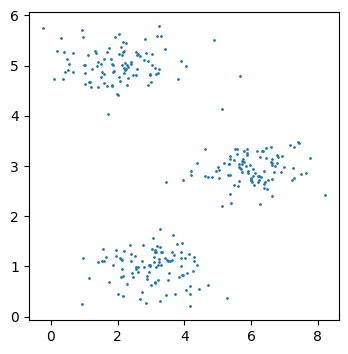

In [278]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(data[:,0], data[:,1], s=1)

Initialize centroids randomly

In [279]:
m = 3 # 3 centroids

random_location = [int(idx) for idx in np.random.rand(m)*data.shape[0]]
random_centroids = data[random_location]
random_centroids = np.array([[2.05670542, 5.23391326], [2.17777173, 4.86154019], [2.95177039, 0.89583143]]) # Case when resolution is not ideal

random_location, random_centroids

([21, 172, 93],
 array([[2.05670542, 5.23391326],
        [2.17777173, 4.86154019],
        [2.95177039, 0.89583143]]))

Run once

In [280]:
# list of losses per iteration
loss = []

# log of centroids moving
interim_centroid = random_centroids.copy()
centroids_log = {0: interim_centroid.copy()}


# max iterations
for i in range(1000):

    assignment = []
    idx_loss = 0

    for point in data:

        distances = np.sum((point - interim_centroid)**2, axis=1)
        min_distance = np.argmin(distances)
        assignment.append(min_distance)
        idx_loss += np.sum((interim_centroid[min_distance] - point)**2, axis=0)

    if i > 0 and abs(idx_loss - loss[-1]) < 1 :
        break

    loss.append(idx_loss)

    assignment = np.array(assignment)

    # adjust centroids to new location (mean of all assignment)

    for idx in range(len(interim_centroid)):
        mean = data[assignment==idx]
        new_centroid = np.mean(mean, axis=0)
        interim_centroid[idx] = new_centroid

    centroids_log[i+1] = interim_centroid.copy()

Plot inefficient solution

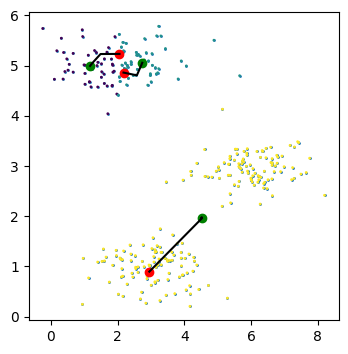

In [282]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(data[:,0], data[:,1], s=1)
ax.scatter(data[:,0], data[:,1], c=assignment, s=1)

centroid_start = centroids_log[0]
ax.scatter(centroid_start[:,0], centroid_start[:,1], c='r')

first_centroid = np.array([val[0,:] for val in centroids_log.values()])
ax.plot(first_centroid[:,0], first_centroid[:,1], c='black')

second_centroid = np.array([val[1,:] for val in centroids_log.values()])
ax.plot(second_centroid[:,0], second_centroid[:,1], c='black')

third_centroid = np.array([val[2,:] for val in centroids_log.values()])
ax.plot(third_centroid[:,0], third_centroid[:,1], c='black')

centroid_end = list(centroids_log.values())[-1]
ax.scatter(centroid_end[:,0], centroid_end[:,1], c='g')

Implement multiple runs and pick one with the best loss

In [312]:
def generate_random_centroids(data, k_means = 3):

    random_location = [int(idx) for idx in np.random.rand(k_means)*data.shape[0]]
    random_centroids = data[random_location]

    return random_centroids


def kmeans(data, k_means, max_tries = 10, max_depth=1000):

    # list of losses per iteration
    iteration_loss = {}

    # j times running k-means
    for j in range(max_tries):

        interim_centroid = generate_random_centroids(data, k_means)

        #data row to cluster assignment
        assignments = np.array([])

        # i times - max steps to find optimal centroid
        for i in range(max_depth):

            assignment = []
            idx_loss = 0

            for point in data:

                distances = np.sum((point - interim_centroid)**2, axis=1)
                min_distance = np.argmin(distances)
                assignment.append(min_distance)
                idx_loss += np.sum((interim_centroid[min_distance] - point)**2, axis=0)

            if i > 0 and abs(idx_loss - loss[-1]) < 1 :
                break

            loss.append(idx_loss)

            assignments = np.array(assignment)

            # adjust centroids to new location (mean of all assignment)

            for idx in range(len(interim_centroid)):
                mean = data[assignments==idx]
                new_centroid = np.mean(mean, axis=0)
                interim_centroid[idx] = new_centroid

        iteration_loss[j] = [loss[-1], interim_centroid, assignments]

    return iteration_loss

results

In [318]:
results = kmeans(data, 3)
results

{0: [267.3445118858382,
  array([[1.95399466, 5.02557006],
         [3.04367119, 1.01541041],
         [6.03366736, 3.00052511]]),
  array([0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

array([4.51637285, 2.81169284, 1.26010106])

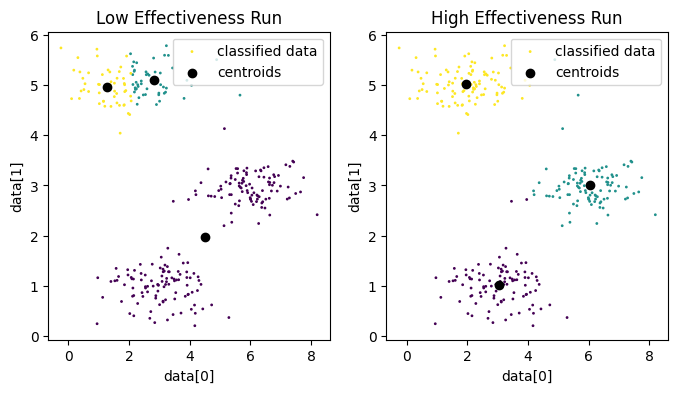

In [337]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].scatter(data[:,0], data[:,1], c=results[2][2], s=1)
ax[0].scatter(results[2][1][:,0], results[2][1][:,1], c='black')
ax[0].set_title('Low Effectiveness Run')
ax[0].set_xlabel('data[0]')
ax[0].set_ylabel('data[1]')
ax[0].legend(['classified data', 'centroids'])

ax[1].scatter(data[:,0], data[:,1], c=results[1][2], s=1)
ax[1].scatter(results[1][1][:,0], results[1][1][:,1], c='black')
ax[1].set_title('High Effectiveness Run')
ax[1].set_xlabel('data[0]')
ax[1].set_ylabel('data[1]')
ax[1].legend(['classified data', 'centroids'])

plt.show()
